In [28]:
import numpy as np
import matplotlib.pyplot as plt
from dmd import Dmd1d
from simulation import Simulation1d

In [29]:
# initiate dmd
dmd = Dmd1d(
    tilt_angle=12,
    mirror_size=5, 
    mirror_gap=2, 
    nr_mirrors_x=10,
    nr_sources_per_mirror=20
)

sim = Simulation1d(
    dmd=dmd,
    incident_angle=90+24,
    wavelength=1,
    field_dimensions=(160, 160),
    res=500//160,
    source_type="spherical"
)

[2.5556017 0.       ]


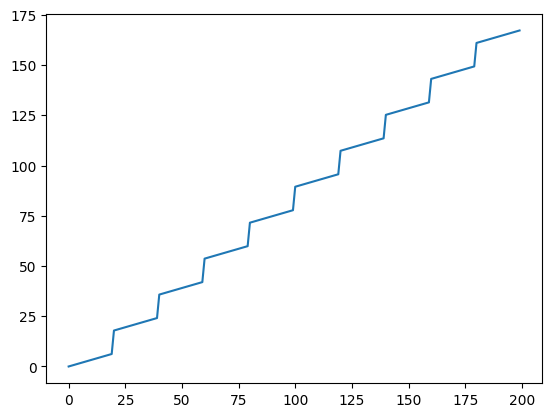

In [30]:
phases=sim.get_total_phases()
# print(phases)
sources = range(dmd.nr_mirrors_x*dmd.nr_sources_per_mirror)
source_phases = [phases[mirror, source] for mirror in range(dmd.nr_mirrors_x) for source in range(dmd.nr_sources_per_mirror)]
plt.plot(sources, source_phases)
plt.show()

In [31]:
E_total = sim.get_E_total()
E_incident = sim.E_incident

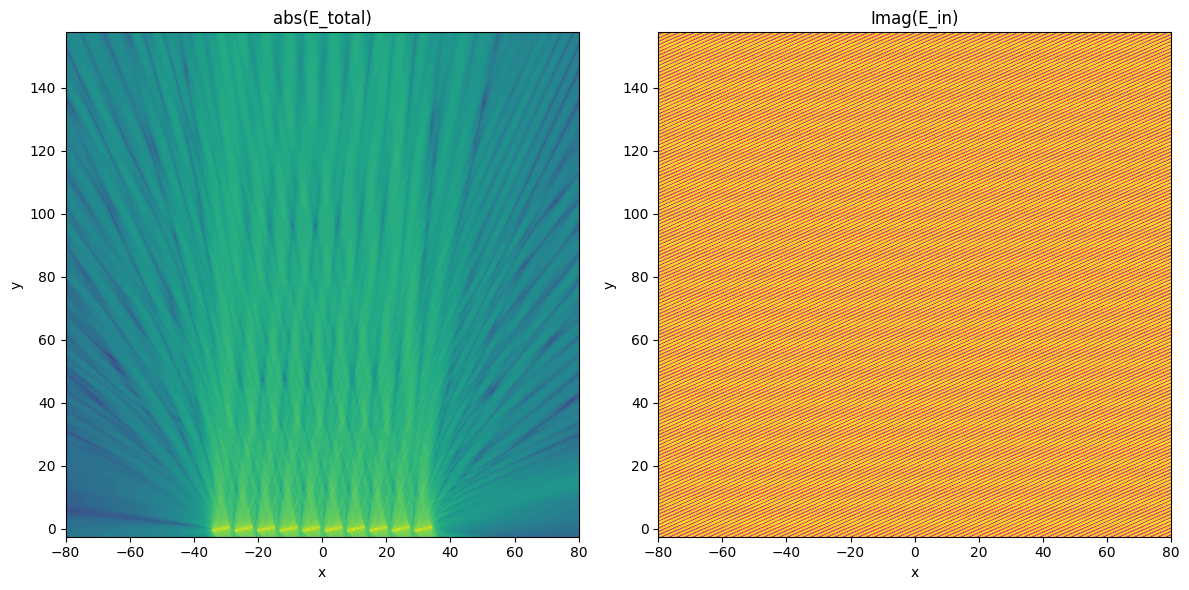

In [35]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot the real part of the total reflected field
plt.subplot(1, 2, 1)
plt.contourf(sim.X, sim.Y, np.log(np.abs(E_total)), levels=50, cmap='viridis')
plt.title('abs(E_total)')
plt.xlabel('x')
plt.ylabel('y')
# plt.ylim(95, 105)

# Plot the imaginary part of the total reflected field
plt.subplot(1, 2, 2)
# plt.contourf(sim.X, sim.Y, np.real((E_incident)), levels=50, cmap='plasma')
plt.contourf(sim.X, sim.Y, np.imag((E_incident)), levels=50, cmap='plasma')
plt.title('Imag(E_in)')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

In [37]:
sim.plot_field_profile(E_total, 160)

IndexError: index 487 is out of bounds for axis 0 with size 480